In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# Read in data
census = pd.read_csv("ACS_Full_Features.csv")
census.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%),Disabled Population Category,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550,Medium,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927,Low,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516,Medium,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656,Medium,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041,Medium,1,9


In [ ]:
# check column names to drop non-numeric, unnecessary columns
census.columns

Index(['NAME', 'Median Age by Sex', 'Total Population', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races',
       'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year', 'Associate's Degree',
       'Bachelor's Degree', 'Master's Degree', 'Professional School Degree',
       'Doctorate', 'Median Income', 'Population Below Poverty Line',
       'Disabled Population', 'Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)', 'Income Category',
       'Poverty Rate (%)', 'Poverty Rate Classification', 'Total Degrees',
   

In [ ]:
# Drop redundant columns like non-percent values, categorical columns, name, state, county

census_bayes = census.drop(columns = ['NAME', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races', "Associate's Degree",
       "Bachelor's Degree", "Master's Degree", 'Professional School Degree',
       'Doctorate', 'Population Below Poverty Line',
       'Disabled Population', 'Median Income', 'Income Category', 'Poverty Rate (%)', 'Total Degrees', 'Degree Attainment', 'POC Population Category', 'White Population (%)',
       'Black/African American Population (%)', 'Asian Population (%)',
       'Hawaiian/Pacific Islander Population (%)',
       'American Indian/Alaskan Population (%)',
       'Some Other Race Population (%)', 'Two or More Races Population (%)', 'Disabled Population Category', 'state',
       'county'])

In [ ]:
# Check corr for multicollinearity, drop more columns
numeric_data = census_bayes.select_dtypes(include=[np.number])
numeric_data.corr()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,"12th Grade, No Diploma",High School Diploma,...,Total Income 25k-35k(%),Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),Degree Percentage (%),POC Population (%),Disabled Population (%)
Median Age by Sex,1.000000,-0.164515,-0.165130,-0.163873,-0.160616,-0.161082,-0.133016,-0.157574,-0.124214,-0.148040,...,0.149705,0.133644,0.096237,-0.024147,-0.137164,-0.167245,-0.112324,0.039915,-0.346768,0.386163
Total Population,-0.164515,1.000000,0.999876,0.999881,0.998902,0.999287,0.985320,0.983243,0.956766,0.981963,...,-0.206665,-0.200617,-0.150528,-0.019950,0.123290,0.263977,0.375554,0.323869,0.215563,-0.218180
Male,-0.165130,0.999876,1.000000,0.999514,0.998484,0.999015,0.983843,0.982787,0.956730,0.980817,...,-0.207367,-0.201057,-0.150027,-0.018872,0.124668,0.265006,0.376034,0.322471,0.213721,-0.218895
Female,-0.163873,0.999881,0.999514,1.000000,0.999072,0.999313,0.986531,0.983453,0.956571,0.982849,...,-0.205927,-0.200138,-0.150982,-0.021002,0.121909,0.262905,0.374994,0.325162,0.217316,-0.217425
Never Married,-0.160616,0.998902,0.998484,0.999072,1.000000,0.999444,0.986144,0.980213,0.960617,0.981194,...,-0.199925,-0.195745,-0.150162,-0.024155,0.115108,0.254316,0.367376,0.321465,0.216846,-0.211771
Now Married,-0.161082,0.999287,0.999015,0.999313,0.999444,1.000000,0.984282,0.978124,0.957522,0.979025,...,-0.207674,-0.202854,-0.154057,-0.022608,0.122060,0.264631,0.380536,0.328367,0.214878,-0.218369
Widowed,-0.133016,0.985320,0.983843,0.986531,0.986144,0.984282,1.000000,0.980689,0.947665,0.989059,...,-0.191753,-0.187481,-0.146456,-0.024797,0.109410,0.246993,0.356363,0.317829,0.213313,-0.196246
Divorced,-0.157574,0.983243,0.982787,0.983453,0.980213,0.978124,0.980689,1.000000,0.931372,0.977419,...,-0.201798,-0.190658,-0.139593,-0.014589,0.120969,0.257630,0.359315,0.331878,0.214447,-0.209414
"12th Grade, No Diploma",-0.124214,0.956766,0.956730,0.956571,0.960617,0.957522,0.947665,0.931372,1.000000,0.956029,...,-0.144402,-0.142570,-0.108384,-0.016192,0.082580,0.184233,0.267553,0.208944,0.197507,-0.159191
High School Diploma,-0.148040,0.981963,0.980817,0.982849,0.981194,0.979025,0.989059,0.977419,0.956029,1.000000,...,-0.190942,-0.181024,-0.130932,-0.007800,0.121910,0.246885,0.330945,0.287506,0.207212,-0.201443


In [ ]:
# The male/female columns have high corr, so do the marriage columns, and the non-college education columns. start with those
census_bayes = census_bayes.drop(columns = [ 'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year'])

In [ ]:
# Check remaining with vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = census_bayes.drop(columns = ['Poverty Rate Classification'])

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                      feature        VIF
0           Median Age by Sex  94.050062
1            Total Population   1.367414
2         Total Income 10k(%)   7.708362
3     Total Income 10k-15k(%)  11.091759
4     Total Income 15k-25k(%)  20.336136
5     Total Income 25k-35k(%)  22.003707
6      Total Income 35k-50(%)  22.861586
7     Total Income 50k-75k(%)  34.221539
8    Total Income 75k-100k(%)  28.359782
9   Total Income 100k-150k(%)  28.221508
10  Total Income 150k-200k(%)  18.092527
11      Total Income >200k(%)  10.859073
12      Degree Percentage (%)  18.007531
13         POC Population (%)   4.191082
14    Disabled Population (%)  30.105468


In [ ]:
# Dropping total income columns because of correlation. The race columns are too important, but that does show a racial disparity that's important to note
census_bayes = census_bayes.drop(columns = ['Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)'])

In [ ]:
# Check dtypes for MN Naive Bayes
census_bayes.dtypes

,0
Median Age by Sex,float64
Total Population,int64
Poverty Rate Classification,object
Degree Percentage (%),float64
POC Population (%),float64
Disabled Population (%),float64


In [ ]:
# Only remaining object is poverty category, which I will binarize
census_bayes['Poverty Rate Classification'] = census_bayes['Poverty Rate Classification'].map({'Low Poverty': 0, 'High Poverty': 1})

In [ ]:
#Next, train/test/split the data
TrainingData, TestingData = train_test_split(census_bayes, test_size=.3, random_state = 343) # Using random_stte for reproduceability
print(TrainingData.head())
print(TestingData.head())

      Median Age by Sex  Total Population  Poverty Rate Classification  \
1055               40.1             30207                            1   
296                39.8            168135                            0   
2295               43.7             45941                            0   
1082               42.3             13840                            0   
549                38.8           1010100                            0   

      Degree Percentage (%)  POC Population (%)  Disabled Population (%)  
1055              11.288774            4.028867                21.528123  
296               16.598567           23.835014                18.078330  
2295              13.149474            4.854052                13.828606  
1082              13.114162            7.254335                23.056358  
549               25.629146           70.617959                11.056925  
      Median Age by Sex  Total Population  Poverty Rate Classification  \
2296               34.8        

In [ ]:
## remove and save the labels from the Training Data
TrainingLabels = TrainingData["Poverty Rate Classification"]
## remove column from training data
TrainingData=TrainingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Training Labels are:")
print(TrainingLabels.head())
print("The Training Data is:")
print(TrainingData.head())

The Training Labels are:
1055    1
296     0
2295    0
1082    0
549     0
Name: Poverty Rate Classification, dtype: int64
The Training Data is:
      Median Age by Sex  Total Population  Degree Percentage (%)  \
1055               40.1             30207              11.288774   
296                39.8            168135              16.598567   
2295               43.7             45941              13.149474   
1082               42.3             13840              13.114162   
549                38.8           1010100              25.629146   

      POC Population (%)  Disabled Population (%)  
1055            4.028867                21.528123  
296            23.835014                18.078330  
2295            4.854052                13.828606  
1082            7.254335                23.056358  
549            70.617959                11.056925  


In [ ]:
# Repeat for test data
TestingLabels = TestingData["Poverty Rate Classification"]
## Drop the label
TestingData=TestingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Testing Labels are:")
print(TestingLabels.head())
print("The Testing Data is:")
print(TestingData.head())

The Testing Labels are:
2296    1
3145    1
651     0
1977    0
1390    0
Name: Poverty Rate Classification, dtype: int64
The Testing Data is:
      Median Age by Sex  Total Population  Degree Percentage (%)  \
2296               34.8           1593208              22.991976   
3145               45.4             37998              16.198221   
651                34.9             27370              19.042748   
1977               43.8             71429              12.910723   
1390               33.8              9682              17.093576   

      POC Population (%)  Disabled Population (%)  
2296           62.863229                16.801008  
3145           50.944787                27.946208  
651            11.834125                14.537815  
1977           11.976928                18.722088  
1390           13.395993                11.165049  


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Scale the data?
from sklearn import preprocessing

In [ ]:
# Instantiate Multinomial NB
MyModelNB_Num= MultinomialNB()

In [ ]:
MyModelNB_Num.fit(TrainingData, TrainingLabels)
PredictionNB = MyModelNB_Num.predict(TestingData)

In [ ]:
# Evaluate model
print("\nThe prediction from NB is:")
print(PredictionNB[:10])
print("\nThe actual labels are:")
print(TestingLabels.head())


The prediction from NB is:
[0 1 1 0 1 1 0 1 0 1]

The actual labels are:
2296    1
3145    1
651     0
1977    0
1390    0
Name: Poverty Rate Classification, dtype: int64


In [ ]:
cnf_matrix = confusion_matrix(TestingLabels, PredictionNB)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[301 521]
 [ 18 127]]


In [ ]:
# Predicition probability
print(np.round(MyModelNB_Num.predict_proba(TestingData),2))
MyModelNB_Num.get_params(deep=True)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

[Text(0.5, 1.0, 'Multinomial Naive Bayes Matrix')]

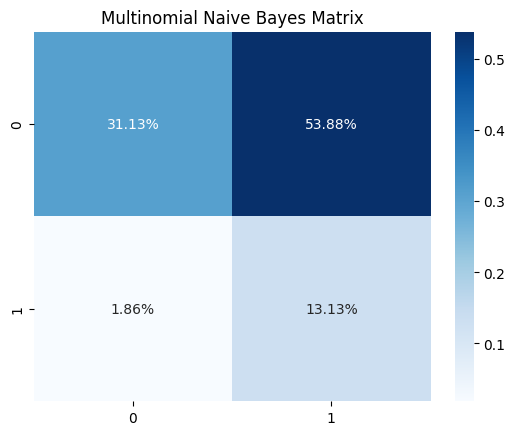

In [ ]:
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Multinomial Naive Bayes Matrix')

In [ ]:
# Accuracy:
accuracy = accuracy_score(PredictionNB, TestingLabels)
print('Accuracy for Multinomial NB:', accuracy)

Accuracy for Multinomial NB: 0.44260599793174765


In [ ]:
# Now for model 2, Gaussian Naive Bayes
# This one will use the Same data
# Unsure of how well the data will fit, but apart from some extreme values it's centralized enough
MyModel_NB_Gaus = GaussianNB()

In [ ]:
MyModel_NB_Gaus.fit(TrainingData, TrainingLabels)
PredictionNB = MyModel_NB_Gaus.predict(TestingData)

In [ ]:
# Evaluate model 2
print("\nThe prediction from NB is:")
print(PredictionNB[:10])
print("\nThe actual labels are:")
print(TestingLabels.head())


The prediction from NB is:
[0 1 0 0 0 0 0 0 0 0]

The actual labels are:
2296    1
3145    1
651     0
1977    0
1390    0
Name: Poverty Rate Classification, dtype: int64


In [ ]:
cnf_matrix = confusion_matrix(TestingLabels, PredictionNB)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[761  61]
 [ 64  81]]


In [ ]:
# Predicition probability
print(np.round(MyModel_NB_Gaus.predict_proba(TestingData),2))
MyModelNB_Num.get_params(deep=True)

[[1.   0.  ]
 [0.23 0.77]
 [0.76 0.24]
 ...
 [0.77 0.23]
 [0.62 0.38]
 [1.   0.  ]]


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

[Text(0.5, 1.0, 'Gaussian Naive Bayes Matrix')]

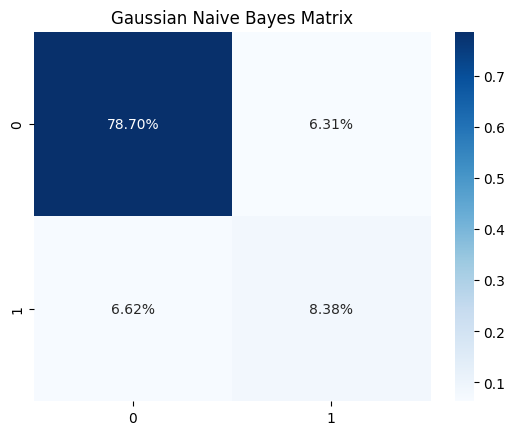

In [ ]:
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Gaussian Naive Bayes Matrix')

In [ ]:
# Accuracy:
accuracy = accuracy_score(PredictionNB, TestingLabels)
print('Accuracy for Gaussian NB:', accuracy)

Accuracy for Gaussian NB: 0.8707342295760083


In [ ]:
# Finally, categorical Naive Bayes
# Will take category columns from fulll dataset and use labelencoder
census_cat = census[['Degree Attainment', 'Disabled Population Category', 'POC Population Category', 'Income Category', 'Poverty Rate Classification']]

In [ ]:
census_cat = census_cat.reset_index()
# To remove slicing error

In [ ]:
census_cat.head()

,index,Degree Attainment,Disabled Population Category,POC Population Category,Income Category,Poverty Rate Classification
0,0,Medium Degree Attainment,Medium,High,Medium,Low Poverty
1,1,Medium Degree Attainment,Low,Medium,High,Low Poverty
2,2,Low Degree Attainment,Medium,High,Low,High Poverty
3,3,Low Degree Attainment,Medium,High,Low,Low Poverty
4,4,Low Degree Attainment,Medium,Low,Medium,Low Poverty


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
for col in census_cat.columns:
    census_cat[col] = encoder.fit_transform(census_cat[col])

In [ ]:
# Check encoding
census_cat.head()

,index,Degree Attainment,Disabled Population Category,POC Population Category,Income Category,Poverty Rate Classification
0,0,2,2,0,2,1
1,1,2,1,2,0,1
2,2,1,2,0,1,0
3,3,1,2,0,1,1
4,4,1,2,1,2,1


In [ ]:
census_cat = census_cat.drop(columns = ['index'])

In [ ]:
census_cat.head()

,Degree Attainment,Disabled Population Category,POC Population Category,Income Category,Poverty Rate Classification
0,2,2,0,2,1
1,2,1,2,0,1
2,1,2,0,1,0
3,1,2,0,1,1
4,1,2,1,2,1


In [ ]:
#Next, train/test/split the data
TrainingData, TestingData = train_test_split(census_cat, test_size=.3, random_state = 343) # Using random_stte for reproduceability
print(TrainingData.head())
print(TestingData.head())

      Degree Attainment  Disabled Population Category  \
1055                  1                             2   
296                   2                             2   
2295                  1                             1   
1082                  1                             2   
549                   0                             1   

      POC Population Category  Income Category  Poverty Rate Classification  
1055                        1                1                            0  
296                         0                2                            1  
2295                        1                0                            1  
1082                        1                1                            1  
549                         0                0                            1  
      Degree Attainment  Disabled Population Category  \
2296                  2                             2   
3145                  2                             0   
651               

In [ ]:
## remove and save the labels from the Training Data
TrainingLabels = TrainingData["Poverty Rate Classification"]
## remove column from training data
TrainingData=TrainingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Training Labels are:")
print(TrainingLabels.head())
print("The Training Data is:")
print(TrainingData.head())

The Training Labels are:
1055    0
296     1
2295    1
1082    1
549     1
Name: Poverty Rate Classification, dtype: int64
The Training Data is:
      Degree Attainment  Disabled Population Category  \
1055                  1                             2   
296                   2                             2   
2295                  1                             1   
1082                  1                             2   
549                   0                             1   

      POC Population Category  Income Category  
1055                        1                1  
296                         0                2  
2295                        1                0  
1082                        1                1  
549                         0                0  


In [ ]:
# Repeat for test data
TestingLabels = TestingData["Poverty Rate Classification"]
## Drop the label
TestingData=TestingData.drop(["Poverty Rate Classification"], axis=1)

In [ ]:
# check results
print("The Testing Labels are:")
print(TestingLabels.head())
print("The Testing Data is:")
print(TestingData.head())

The Testing Labels are:
2296    0
3145    0
651     1
1977    1
1390    1
Name: Poverty Rate Classification, dtype: int64
The Testing Data is:
      Degree Attainment  Disabled Population Category  \
2296                  2                             2   
3145                  2                             0   
651                   2                             1   
1977                  1                             2   
1390                  2                             1   

      POC Population Category  Income Category  
2296                        0                2  
3145                        0                3  
651                         2                1  
1977                        2                2  
1390                        2                2  


In [ ]:
# Instantiate model
MyModel_NB_Cat = CategoricalNB()

In [ ]:
MyModel_NB_Cat.fit(TrainingData, TrainingLabels)
PredictionNB = MyModel_NB_Cat.predict(TestingData)

In [ ]:
# Evaluate model 3
print("\nThe prediction from NB is:")
print(PredictionNB[:10])
print("\nThe actual labels are:")
print(TestingLabels.head())


The prediction from NB is:
[1 0 1 1 1 1 1 1 1 0]

The actual labels are:
2296    0
3145    0
651     1
1977    1
1390    1
Name: Poverty Rate Classification, dtype: int64


In [ ]:
cnf_matrix = confusion_matrix(TestingLabels, PredictionNB)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[113  32]
 [ 76 746]]


In [ ]:
# Predicition probability
print(np.round(MyModel_NB_Cat.predict_proba(TestingData),2))
MyModelNB_Num.get_params(deep=True)

[[0.05 0.95]
 [0.99 0.01]
 [0.07 0.93]
 ...
 [0.   1.  ]
 [0.16 0.84]
 [0.02 0.98]]


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

[Text(0.5, 1.0, 'Categorical Naive Bayes Matrix')]

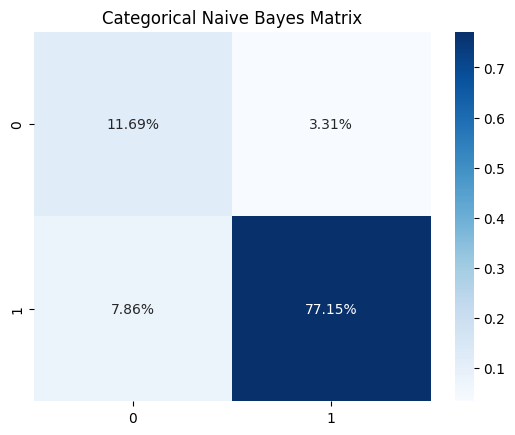

In [ ]:
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Categorical Naive Bayes Matrix')

In [ ]:
# Accuracy:
accuracy = accuracy_score(PredictionNB, TestingLabels)
print('Accuracy for Categorical NB:', accuracy)

Accuracy for Categorical NB: 0.8883143743536711
